4.8\. Diffusion using random walk (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

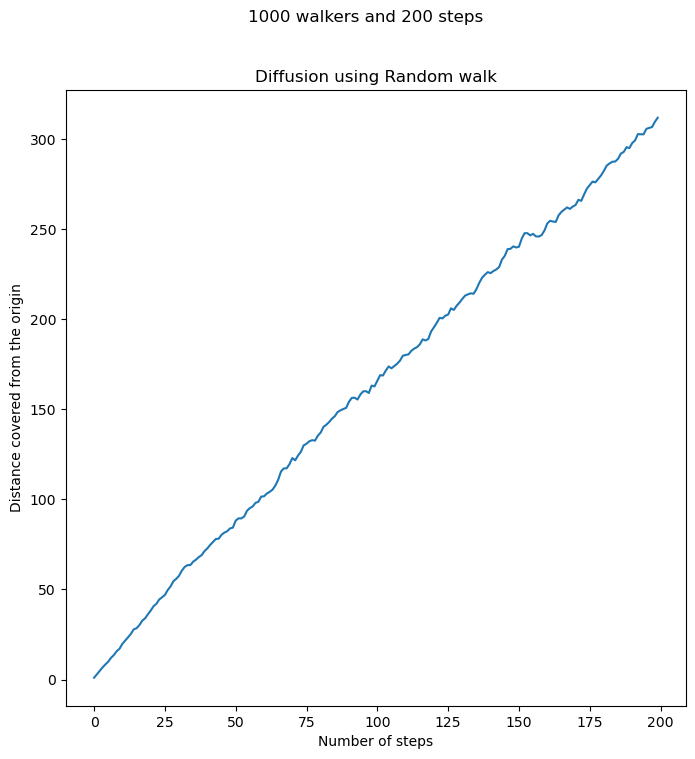

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
# defining the number of walkers and the number of steps
walkers = 1000
steps = 200

# generating an array with (-1,1) with 1000 walkers and 200 steps
random_steps = 2*np.random.randint(0, 2, size=(walkers, steps)) - 1
distance = np.cumsum(random_steps, axis=1)
squared_distances = distance**2
# computing the mean square
mean_squared_distance = np.mean(squared_distances**2, axis=0)
rms_distance = np.sqrt(mean_squared_distance)

# plotting of the results
plt.figure(figsize=(8,8))
plt.plot(np.arange(steps), rms_distance, label='RMS distance')
plt.xlabel('Number of steps')
plt.ylabel('Distance covered from the origin')
plt.title('Diffusion using Random walk')
plt.suptitle('1000 walkers and 200 steps')
plt.show()

7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

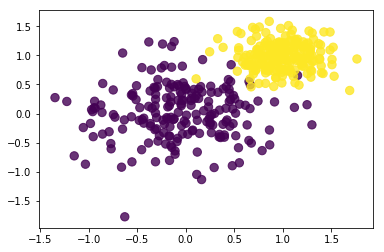

In [1]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

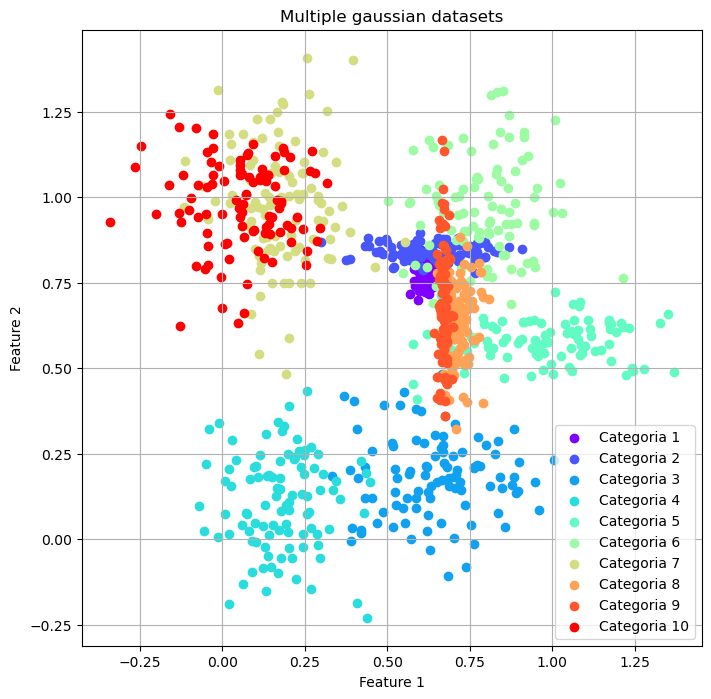

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per generare i dataset
def generating_datasets(means, stds, n=100):
    data_list = []
    for mean, std in zip(means, stds):
        data = np.random.normal(loc=mean[0], scale=std[0], size=(n, 1))
        data2 = np.random.normal(loc=mean[1], scale=std[1], size=(n, 1))
        data = np.hstack((data, data2))  # Combina le due colonne
        data_list.append(data)
    return data_list

# Funzione per creare il plot scatter
def scatter_plot(data_list, labels=None):
    plt.figure(figsize=(8,8))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(data_list)))
    for i, data in enumerate(data_list):
        plt.scatter(data[:,0], data[:,1], c=[colors[i]], marker='o', label=labels[i] if labels else f"Categoria {i+1}")
    plt.title('Multiple gaussian datasets')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parametri
n = 10  # Ridotto a 10 per una visualizzazione più chiara
means = np.random.uniform(0, 1, size=(n, 2))
stds = np.random.uniform(0.001, 0.2, size=(n, 2))
labels = [f"Categoria {i+1}" for i in range(n)]

# Genera i dataset
data_list = generating_datasets(means, stds, n=100)

# Crea il plot
scatter_plot(data_list, labels)


9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```

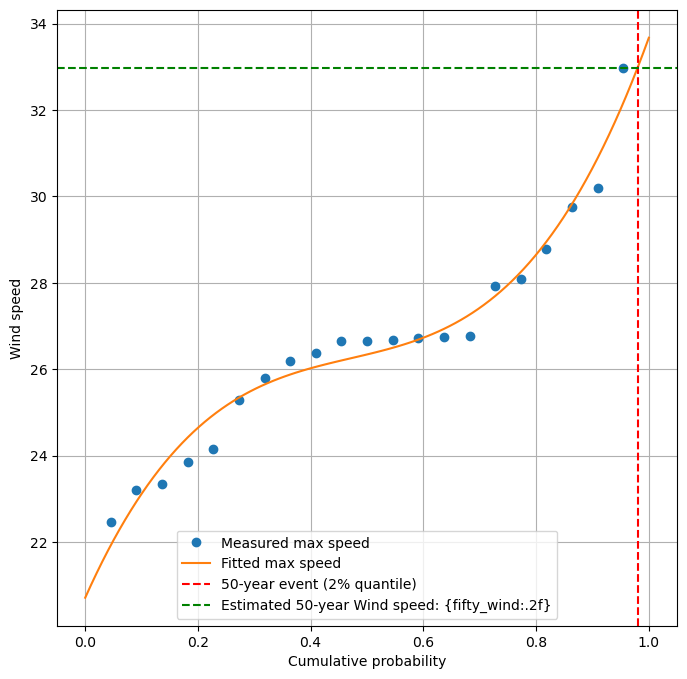

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as us

max_speeds = np.load(r'C:\Users\NickBello\Desktop\phyton_shit\max-speeds.npy')
year_nb = max_speeds.shape[0]

cumulative_prob = np.arange(1, year_nb+1)/(year_nb+1)
sorted_speeds = np.sort(max_speeds)

quantile_function = us(cumulative_prob, sorted_speeds)

n_prob = np.linspace(0, 1, 100)
fitted_max_speeds = quantile_function(n_prob)

prob_fifty_years = 1. - 0.02
estimated_speeds = quantile_function(prob_fifty_years)

plt.figure(figsize=(8,8))
plt.plot(cumulative_prob, sorted_speeds, 'o', label='Measured max speed')
plt.plot(n_prob, fitted_max_speeds, label='Fitted max speed')
plt.axvline(x=prob_fifty_years, color='red', linestyle='--', label='50-year event (2% quantile)')
plt.axhline(y=estimated_speeds, color='g', linestyle='--', label='Estimated 50-year Wind speed: {fifty_wind:.2f}')
plt.xlabel('Cumulative probability')
plt.ylabel('Wind speed')
plt.legend()
plt.grid(True)
plt.show()

10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [39]:
import numpy as np

def f(x): return (x**(-1/2))/(np.exp(x)+1)
def w(x): return 1/np.sqrt(x)

# number of samples for the montecarlo method
N = 10**5
# initializing the integral
I = 0
# initializing the vector x
x = np.random.random(N)
# computing the integral of w(x) as a sum of single contribute
int_w = np.sum(w(x))/N
# computing hte integral with montecarlo method
x=x**2
integral = np.sum(f(x)/w(x))*int_w/N
print(integral)

0.8395844178624704
